## **Airbnb Data Analysis: Insights from New York City**
This project analyses the 2019 Airbnb dataset from New York City to uncover trends, patterns, and insights about the platform's operations in one of the world's most visited cities. The dataset includes information on over 48,000 listings, covering aspects like neighborhood distribution, pricing, availability, and customer reviews.s analysts.

## The Objective of this analysis is:

* Explore trends in Airbnb listings across New York City.
* Identify factors influencing property pricing and availability.
* Highlight the geographical distribution of listings and popular neighborhoods.


Using Python for data analysis, along with visualization libraries like Matplotlib and Seaborn, this project aims to provide actionable insights into the Airbnb market in New York City. These insights can assist stakeholders in making data-driven decisions, whether they are hosts, travelers, or business analysts.

In [1]:
# Importing necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading and exploring the Dataset

In [2]:
df = pd.read_csv('/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## Dataset descripton

* **Source** : The dataset is publicly available on Inside Airbnb, which aggregates and curates Airbnb data for public use.
* **Year** : 2019
* **Data fields** : The dataset include attributs such as:
  1. **id**: Unique identifier for each listing.
  2. **name**: Name of the listing.
  3. **host_id**: Unique identifier for each host.
  4. **neighbourhood_group**: The borough of the listing (e.g., Manhattan, Brooklyn).
  5. **neighbourhood**: The specific neighborhood within the borough.
  6. **latitude & longitude**: Geographical coordinates of the listing.
  7. **price**: Price per night.
  8. **minimum_nights**: Minimum nights required to book.
  9. **number_of_reviews**: Total reviews for the listing.
  10. **last_review**: Date of the most recent review.
  11. **availability_365**: No of days available in a year.in a year.

In [3]:
## Finding the no. of NUll values
nulldf = df.isna().sum().reset_index(name='Null values')
nulldf = nulldf.loc[nulldf['Null values']>0].sort_values(by='Null values', ascending=False)
nulldf

,index,Null values
12,last_review,10052
13,reviews_per_month,10052
3,host_name,21
1,name,16


## 1. Distribution of Airbnb price range.

In [4]:
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

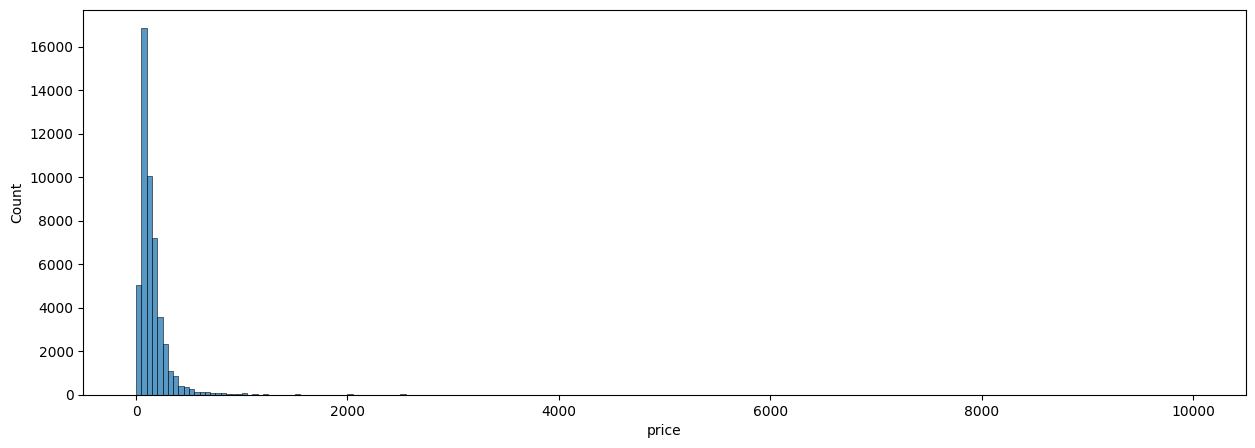

In [5]:
# Checking for outliers
plt.figure(figsize=(15,5))
sns.histplot(df['price'],bins=200)

As we can see in the plot there are some outliers available

In [6]:
## handling Outliers

q1 = np.percentile(df['price'],25)
q3 = np.percentile(df['price'],75)
iqr = q3-q1
upper_bound = q3 + 1.5*iqr
lower_bound = q1 - 1.5*iqr
price_df = df[(df['price']>lower_bound) & (df['price']<upper_bound)]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

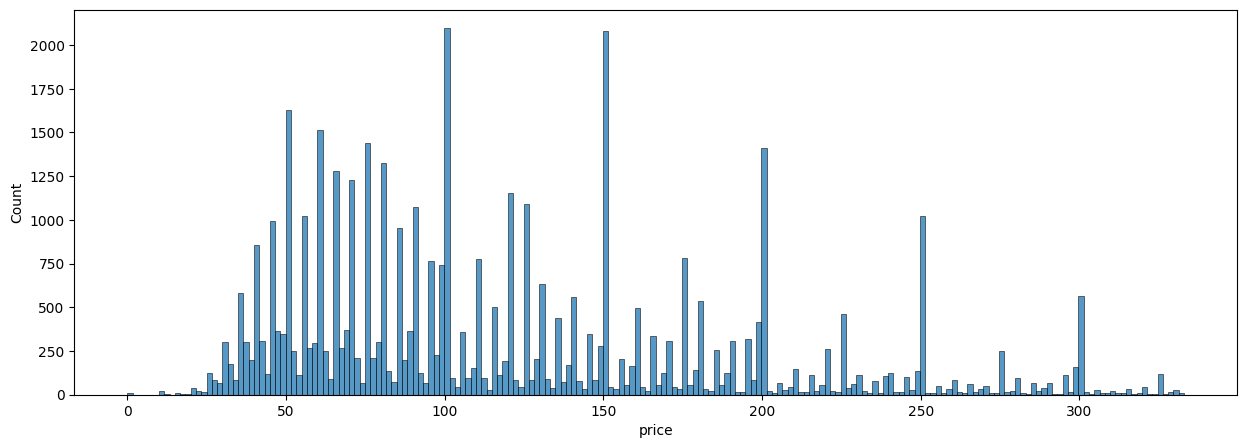

In [7]:
plt.figure(figsize=(15,5))
sns.histplot(price_df['price'],bins=200)

## 2. Total no of listings in each neighborhood group in NYC

,neighbourhood_group,count
0,Manhattan,21661
1,Brooklyn,20104
2,Queens,5666
3,Bronx,1091
4,Staten Island,373


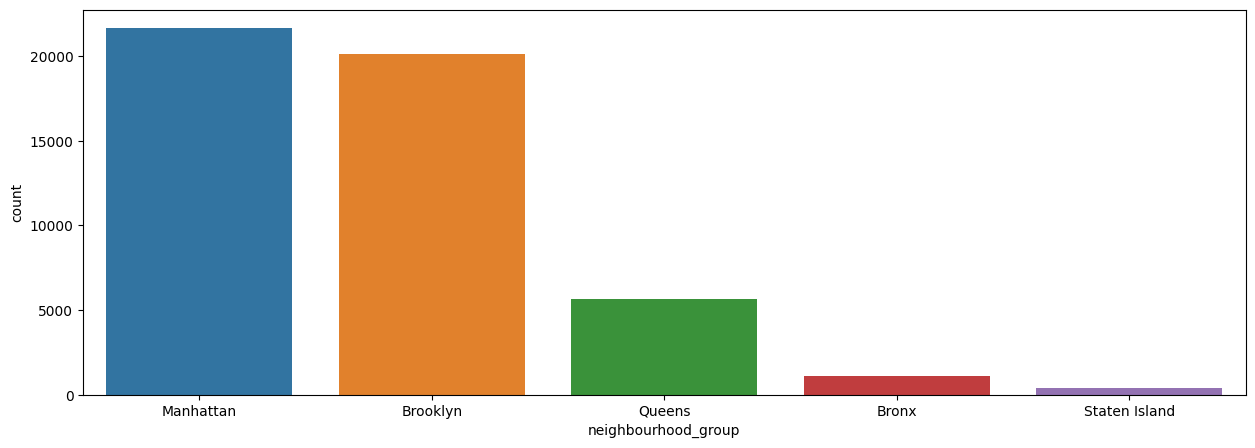

In [8]:
nbr_df = df['neighbourhood_group'].value_counts().reset_index()
plt.figure(figsize=(15,5))
sns.barplot(x='neighbourhood_group',y='count', data=nbr_df)
nbr_df

## 3. Average price of listings in each neighborhood group and neighborhood

Average price per neighbothood_group : 
   neighbourhood_group   Avg_price
2           Manhattan  196.875814
1            Brooklyn  124.383207
4       Staten Island  114.812332
3              Queens   99.517649
0               Bronx   87.496792


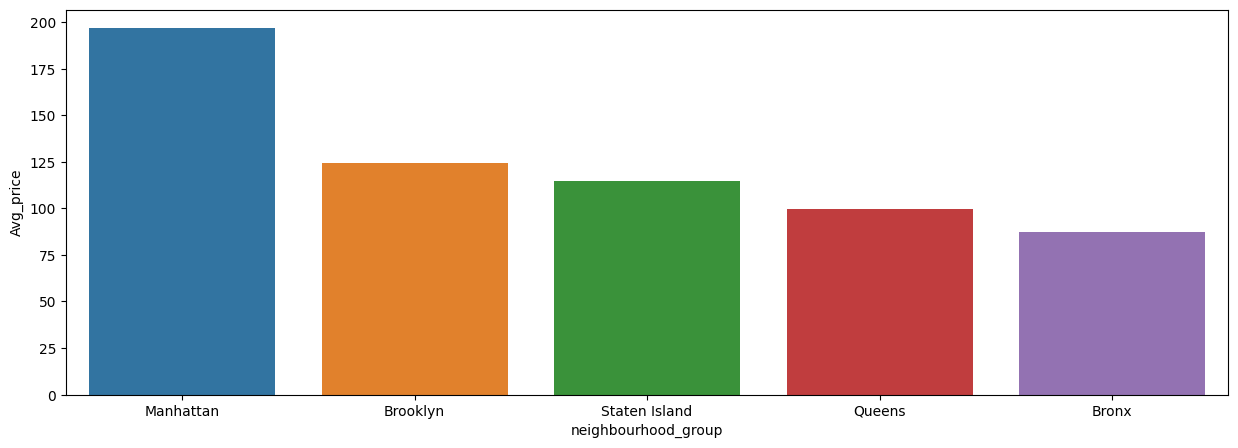

In [9]:
# Average price for each neighbourhood_group
n_grp_avg = df.groupby('neighbourhood_group')['price'].mean().reset_index(name = 'Avg_price').sort_values(by='Avg_price', ascending=False)
plt.figure(figsize=(15,5))
sns.barplot(x='neighbourhood_group', y='Avg_price', data = n_grp_avg)
print('Average price per neighbothood_group : \n',n_grp_avg)

Average price per neighbothood: 
        neighbourhood   Avg_price
0           Allerton   87.595238
1      Arden Heights   67.250000
2           Arrochar  115.000000
3            Arverne  171.779221
4            Astoria  117.187778
..               ...         ...
216  Windsor Terrace  138.993631
217        Woodhaven   67.170455
218         Woodlawn   60.090909
219          Woodrow  700.000000
220         Woodside   85.097872

[221 rows x 2 columns]


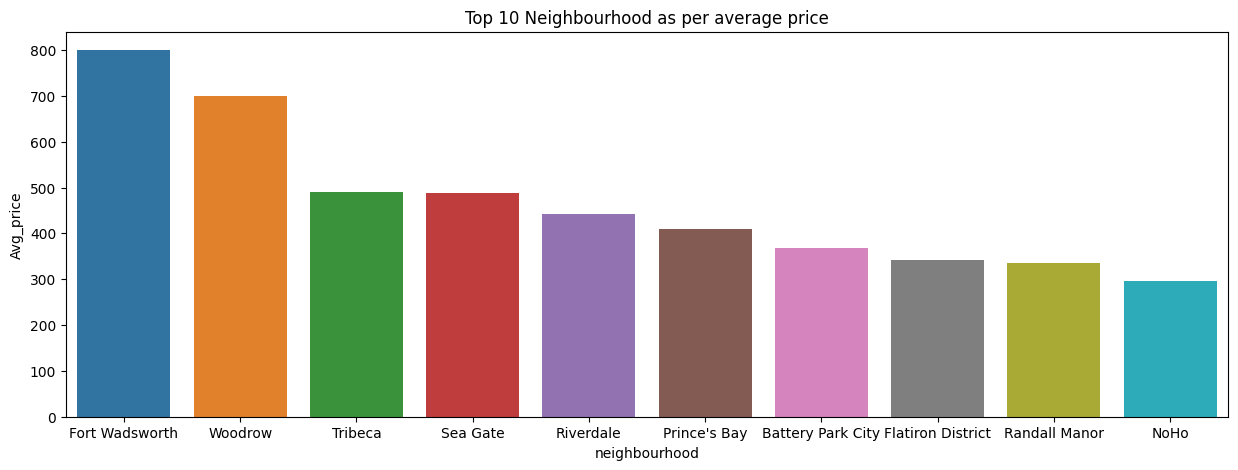

In [10]:
# Average price for each neighbourhood
nbr_avg = df.groupby('neighbourhood')['price'].mean().reset_index(name = 'Avg_price')
top_nbr = nbr_avg.sort_values(by='Avg_price', ascending=False).head(10)
plt.figure(figsize=(15,5))
sns.barplot(x='neighbourhood', y='Avg_price', data = top_nbr)
plt.title('Top 10 Neighbourhood as per average price')
print('Average price per neighbothood: \n',nbr_avg)

## 4. Top neighbourhoods and hosts by listings in entire NYC

,neighbourhood,No. of listings
0,Williamsburg,3920
1,Bedford-Stuyvesant,3714
2,Harlem,2658
3,Bushwick,2465
4,Upper West Side,1971
5,Hell's Kitchen,1958
6,East Village,1853
7,Upper East Side,1798
8,Crown Heights,1564
9,Midtown,1545


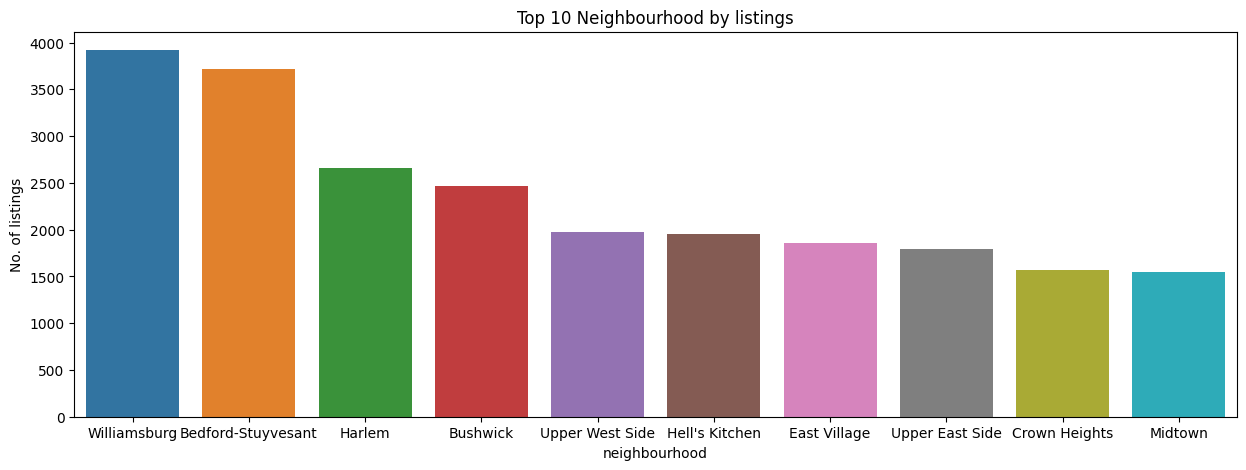

In [11]:
# Top neighbourhoods by listings

lnbr_top = df['neighbourhood'].value_counts().reset_index(name = 'No. of listings').sort_values(by='No. of listings', ascending=False).head(10)
plt.figure(figsize=(15,5))
sns.barplot(x='neighbourhood', y='No. of listings', data = lnbr_top)
plt.title('Top 10 Neighbourhood by listings')
lnbr_top

,host_name,No. of listings
0,Michael,417
1,David,403
2,Sonder (NYC),327
3,John,294
4,Alex,279
5,Blueground,232
6,Sarah,227
7,Daniel,226
8,Jessica,205
9,Maria,204


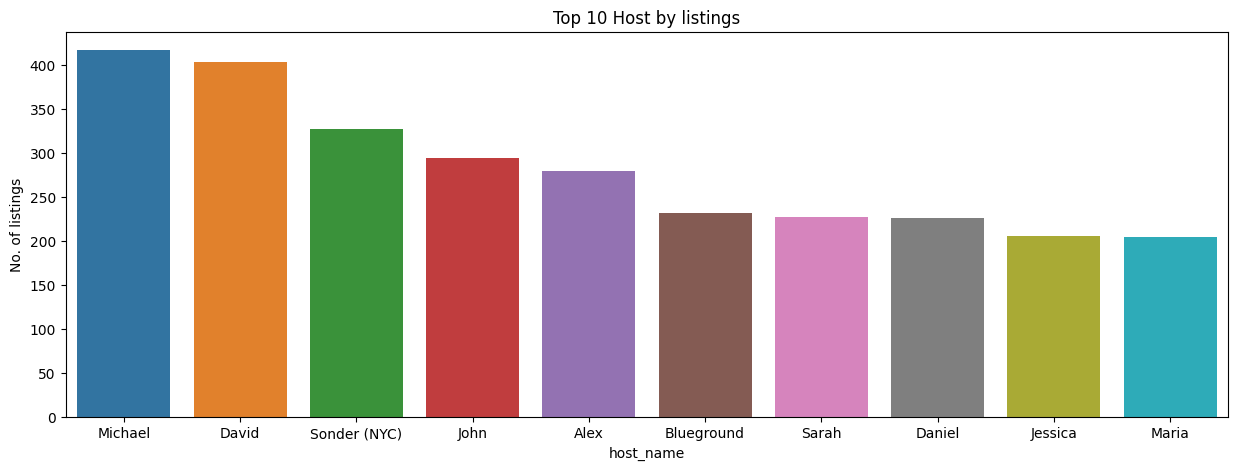

In [12]:
# Top 10 Hosts by listings

host_top = df['host_name'].value_counts().reset_index(name='No. of listings').sort_values(by='No. of listings', ascending=False).head(10)
plt.figure(figsize=(15,5))
sns.barplot(x='host_name', y='No. of listings', data=host_top)
plt.title('Top 10 Host by listings')
host_top

## 5. No. of active hosts by neighbourhood group

,neighbourhood_group,no. of hosts
0,Manhattan,16578
1,Brooklyn,15966
2,Queens,3983
3,Bronx,789
4,Staten Island,256


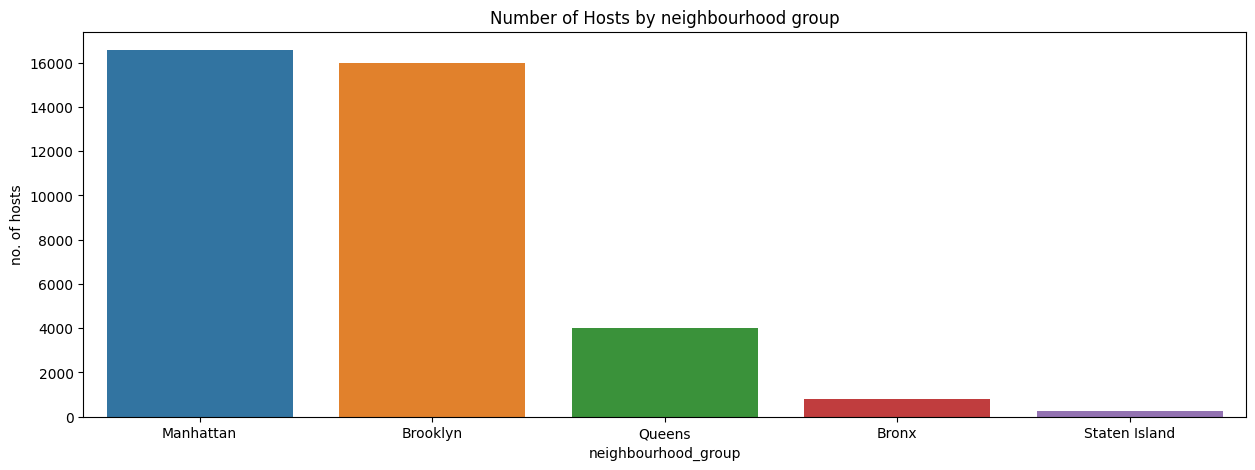

In [13]:
act_host = df.groupby('neighbourhood_group')['host_id'].nunique().sort_values(ascending=False).reset_index(name='no. of hosts')
plt.figure(figsize=(15,5))
sns.barplot(x='neighbourhood_group', y='no. of hosts', data=act_host)
plt.title('Number of Hosts by neighbourhood group')
act_host

## 6. Total count of each room type in NYC

Text(0.5, 1.0, 'Count of each room type in NYC')

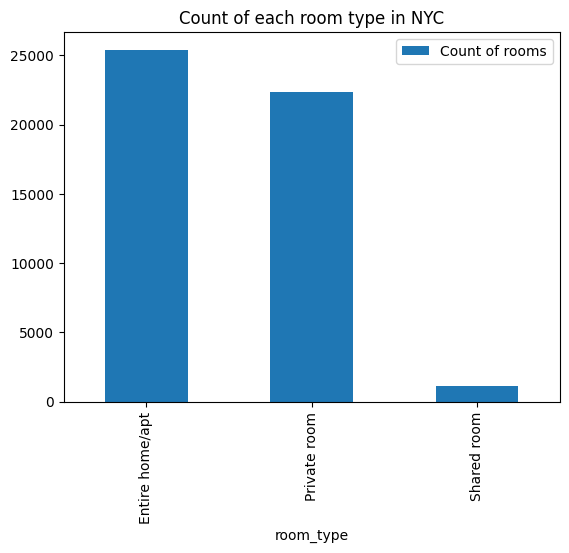

In [14]:
df['room_type'].value_counts().reset_index(name='Count of rooms').plot(kind='bar', x='room_type', y='Count of rooms')
plt.title('Count of each room type in NYC')

## 7. Stay requirement counts by minimum nights

<Axes: >

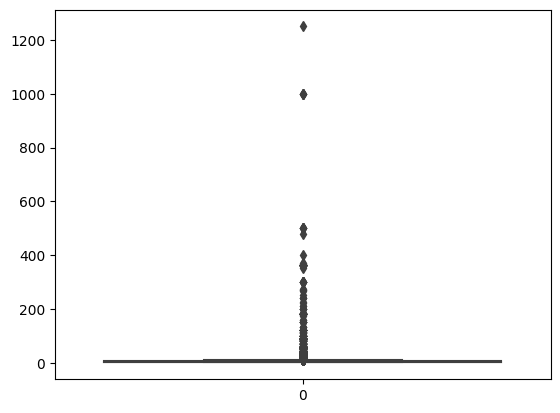

In [15]:
sns.boxplot(df['minimum_nights'])

As we can see the multiple outliers available in plot.

In [16]:
## handling Outliers

q1 = np.percentile(df['minimum_nights'],25)
q3 = np.percentile(df['minimum_nights'],75)
iqr = q3-q1
upper_bound = q3 + 1.5*iqr
lower_bound = q1 - 1.5*iqr
min_ngt_df = df[(df['minimum_nights']>lower_bound) & (df['minimum_nights']<upper_bound)]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Stay requirement counts by minimum nights')

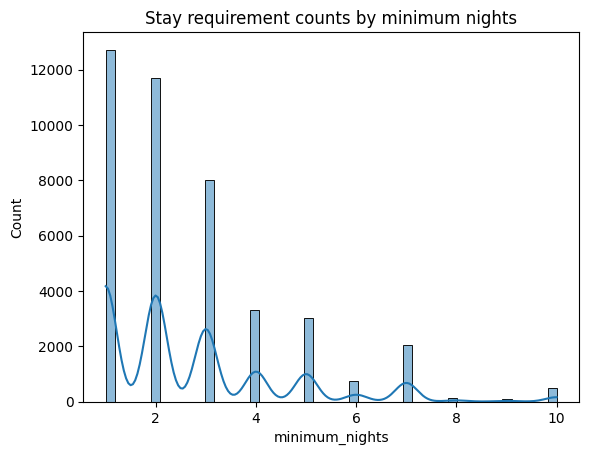

In [17]:
sns.histplot(min_ngt_df['minimum_nights'], kde=True, bins=50)
plt.title('Stay requirement counts by minimum nights')

## 8. Total no. of reviews and maximum reviews by each neighbourhood group

Neighbourhood Group with Maximum review is : 
 neighbourhood_group     Staten Island
Total no. of reviews           486574
dtype: object


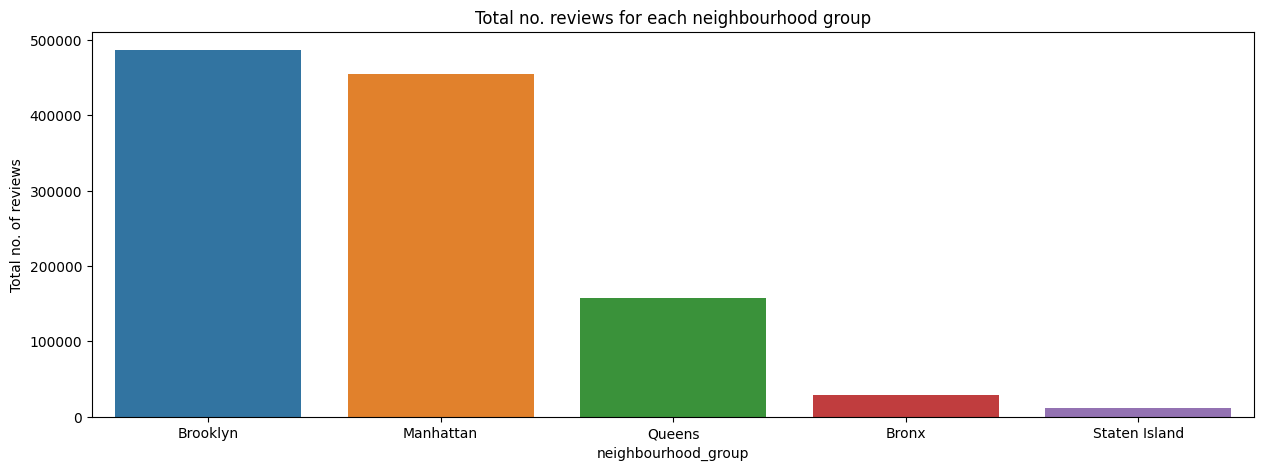

In [18]:
rvw_df = df.groupby('neighbourhood_group')['number_of_reviews'].sum().sort_values(ascending=False).reset_index(name='Total no. of reviews')
plt.figure(figsize=(15,5))
sns.barplot(x='neighbourhood_group', y='Total no. of reviews', data=rvw_df)
plt.title('Total no. reviews for each neighbourhood group')
print('Neighbourhood Group with Maximum review is : \n',rvw_df.max())

## 9. Most reviewed roomtype in neighbourhood group per month

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,2.238123,1.641660,1.351860
Brooklyn,1.317630,1.255758,1.070966
Manhattan,1.141610,1.448949,1.792781
Queens,1.967302,1.947959,1.522895
Staten Island,2.074400,1.699182,1.332000


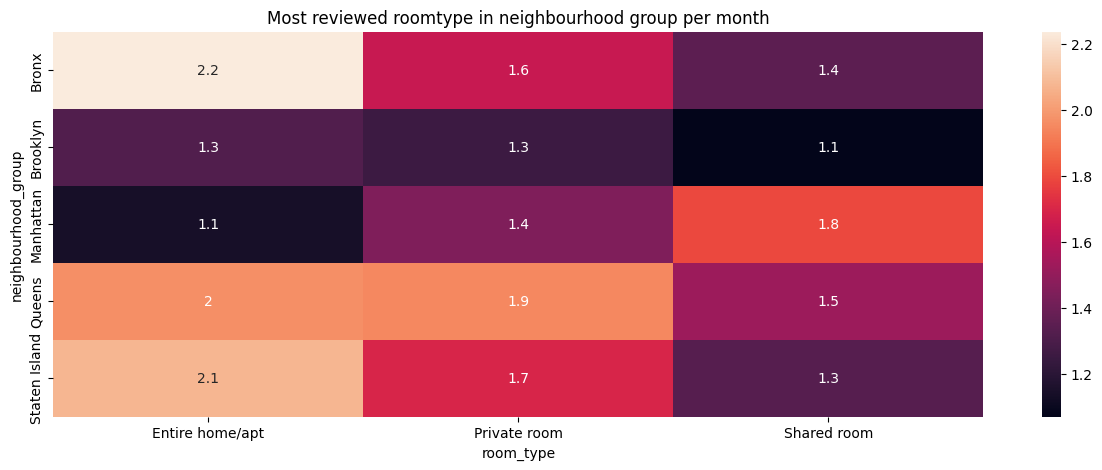

In [19]:
r_type = df.groupby(['neighbourhood_group', 'room_type'])['reviews_per_month'].mean().unstack()
plt.figure(figsize=(15,5))
sns.heatmap(r_type, annot=True)
plt.title('Most reviewed roomtype in neighbourhood group per month')
r_type
# Here we are taking mean to find average of reviews per month

# plotting one more graph for the same to visualize it in a better way

Text(0.5, 1.0, 'Most reviewed roomtype in neighbourhood group per month')

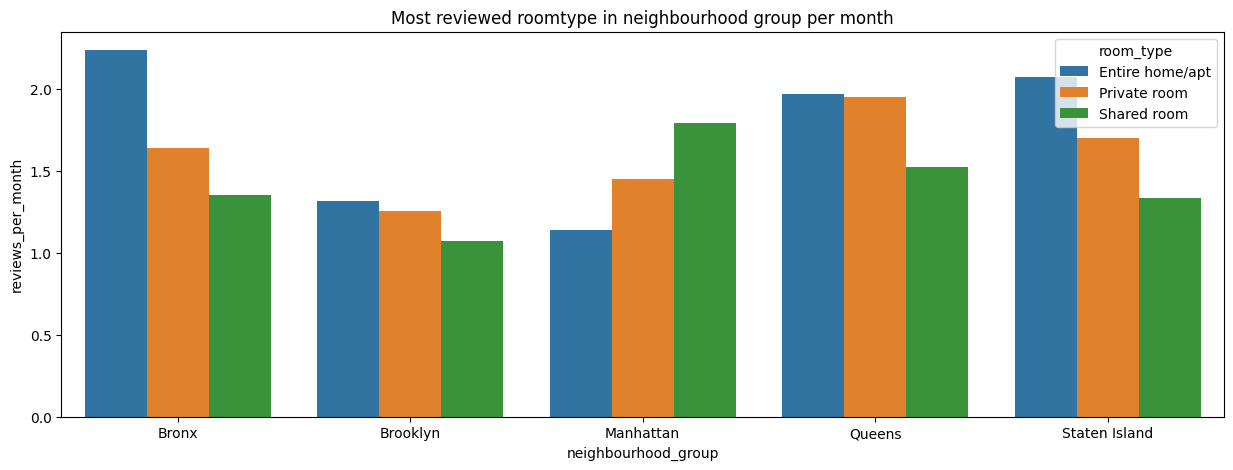

In [20]:
r_type = df.groupby(['neighbourhood_group', 'room_type'])['reviews_per_month'].mean().reset_index()
plt.figure(figsize=(15,5))
sns.barplot(data=r_type, x='neighbourhood_group',y='reviews_per_month', hue='room_type')
plt.title('Most reviewed roomtype in neighbourhood group per month')

## 10. Best location listing for travelllers

   * Best neighourhood with highest property listing

In [21]:
print('Top-10 neighbourhood with most properties are :\n','\n', df.groupby('neighbourhood')['calculated_host_listings_count'].sum().sort_values(ascending=False).reset_index(name='Property Counts').head(10))

Top-10 neighbourhood with most properties are :
 
         neighbourhood  Property Counts
0  Financial District            85454
1         Murray Hill            26125
2      Hell's Kitchen            25169
3             Midtown            25019
4    Theater District            18704
5             Chelsea            18098
6     Upper East Side            16282
7     Upper West Side            13360
8  Bedford-Stuyvesant             9688
9             Tribeca             7606


  * Best location in terms of Popularity

In [22]:
print('Top-10 Location with most no. of reviews are :\n','\n', df.groupby('name')['number_of_reviews'].max().sort_values(ascending=False).reset_index(name='No.of reviews').head(10))

Top-10 Location with most no. of reviews are :
 
                                                 name  No.of reviews
0                            Room near JFK Queen Bed            629
1                         Great Bedroom in Manhattan            607
2                     Beautiful Bedroom in Manhattan            597
3                       Private Bedroom in Manhattan            594
4                            Room Near JFK Twin Beds            576
5                  Steps away from Laguardia airport            543
6           Manhattan Lux Loft.Like.Love.Lots.Look !            540
7  Cozy Room Family Home LGA Airport NO CLEANING FEE            510
8                 Private brownstone studio Brooklyn            488
9                    LG Private Room/Family Friendly            480


  * Best location in terms of Luxury

In [23]:
print('Top-10 Location with highest pricing :\n','\n', df.groupby('name')['price'].max().sort_values(ascending=False).reset_index(name='Price').head(10))

Top-10 Location with highest pricing :
 
                                                 name  Price
0                                1-BR Lincoln Center  10000
1                Furnished room in Astoria apartment  10000
2    Luxury 1 bedroom apt. -stunning Manhattan views  10000
3  2br - The Heart of NYC: Manhattans Lower East ...   9999
4                Quiet, Clean, Lit @ LES & Chinatown   9999
5                                 Spanish Harlem Apt   9999
6  Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho   8500
7                                      Film Location   8000
8          East 72nd Townhouse by (Hidden by Airbnb)   7703
9                               Gem of east Flatbush   7500


  * Best location in terms of Availability

In [24]:
print('Top-10 Location with highest availability :\n','\n', df.groupby('name')['availability_365'].max().sort_values(ascending=False).reset_index(name='availability').head(10))

Top-10 Location with highest availability :
 
                                                 name  availability
0  Gorgeous Bedroom in the heart of Bushwick Him-...           365
1                 Cozy Comfortable Friendly & Cheap!           365
2                                   THE 602 SHOWROOM           365
3                       THE BEST HOUSE IN BROOKLYN !           365
4                                        Cozy Corner           365
5    Beautiful  studio apt. near Hudson River Park!!           365
6                 Cozy Cool Room in my Charming Loft           365
7                          THE BROOKLYN BLUE HOUSE 2           365
8       Sixth Ave Chelsea, Studio Serviced Apartment           365
9                            Cozy Comfy Private Room           365


## 11. Price variations in NYC neighbourhood groups

In [25]:
## Removing outliers
q1 = np.percentile(df['price'],25)
q3 = np.percentile(df['price'],75)
iqr = q3-q1
upper_bound = q3 + 1.5*iqr
lower_bound = q1 - 1.5*iqr
price_df = df[(df['price']>lower_bound) & (df['price']<upper_bound)]

<Axes: xlabel='neighbourhood_group', ylabel='price'>

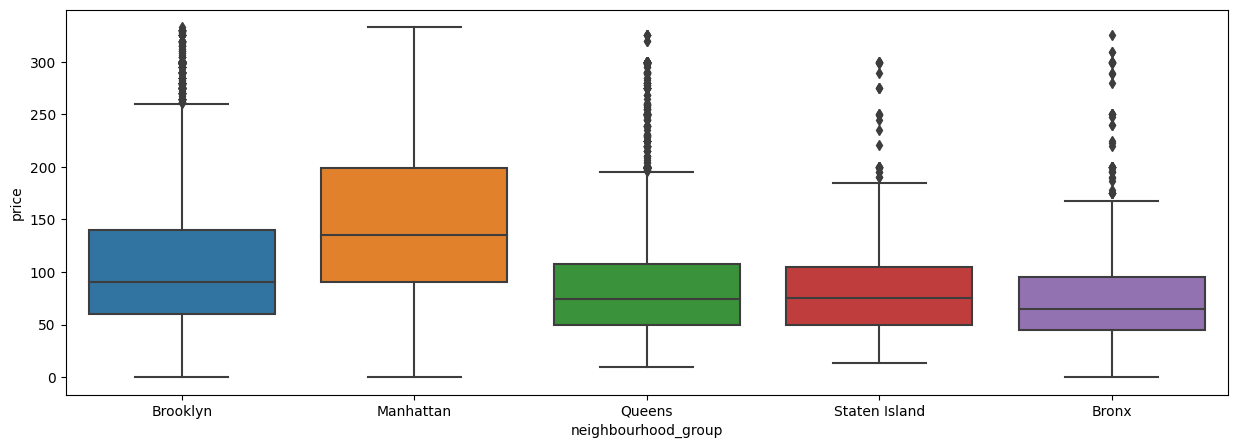

In [26]:
plt.figure(figsize=(15,5))
sns.boxplot(x='neighbourhood_group', y='price', data=price_df)

  * Price variation in different neighbourhoods for each neighbourhood groups.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


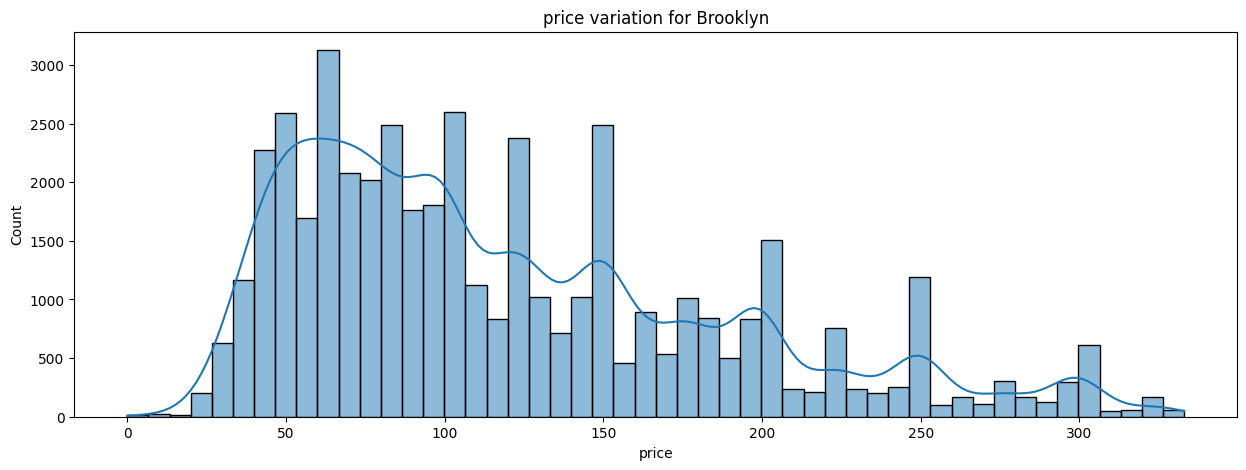

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


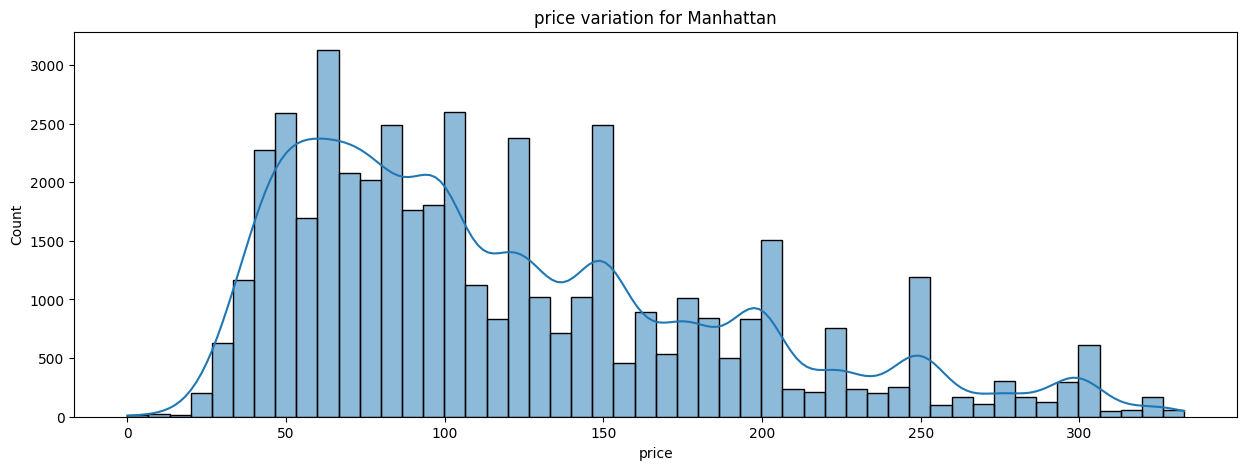

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


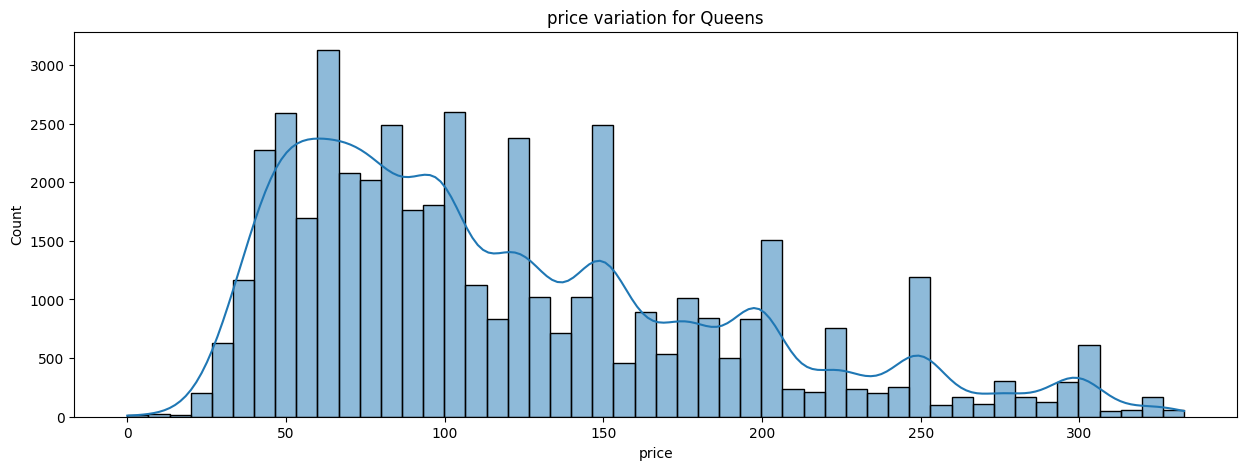

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


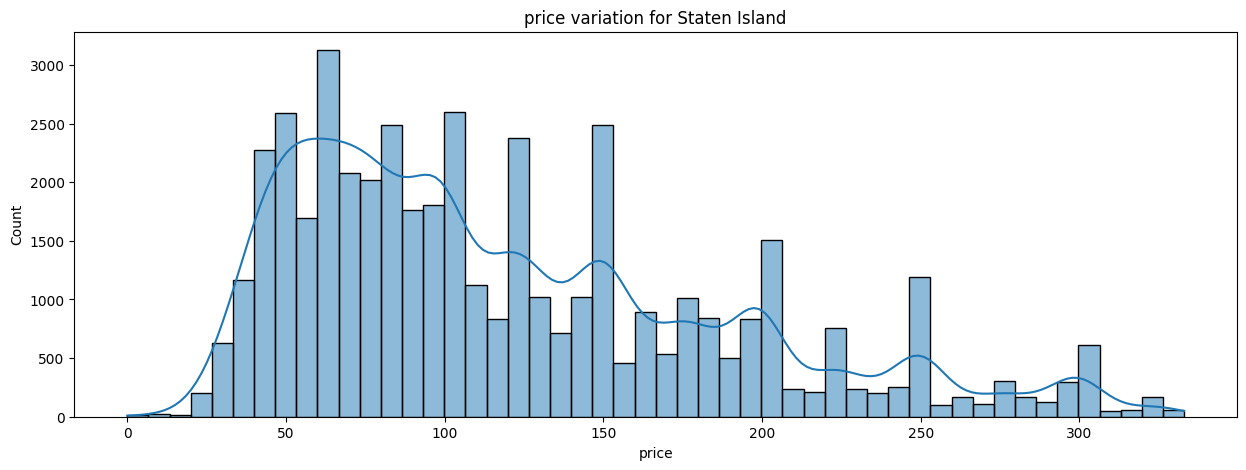

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


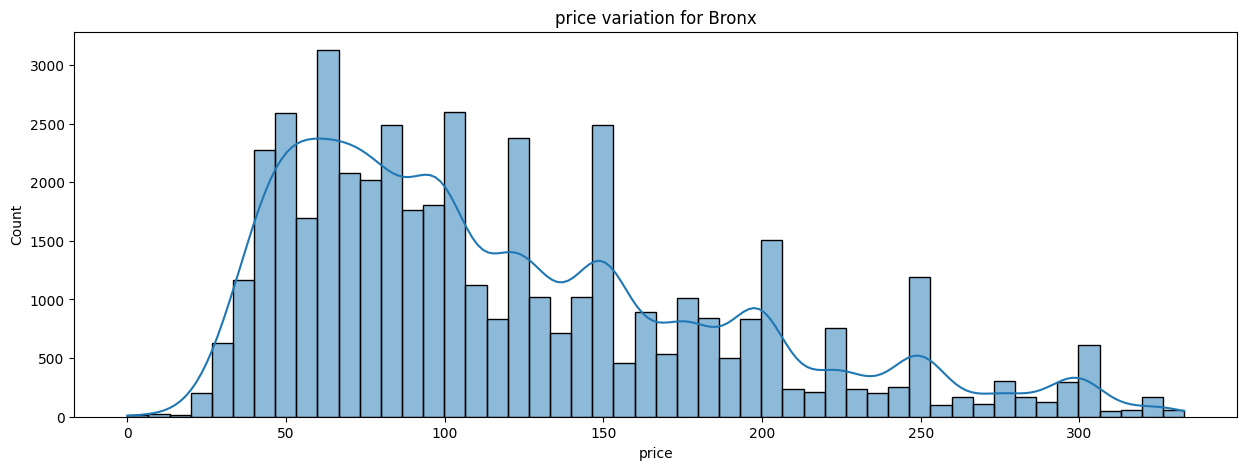

In [27]:
for i in price_df['neighbourhood_group'].unique():
    n_check = price_df[price_df['neighbourhood_group']==i]
    plt.figure(figsize=(15,5))
    sns.histplot(price_df['price'], bins=50,kde=True,label=i)
    plt.title(f'price variation for {i}')
    plt.show()